In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython import display
from time import sleep


In [20]:
def objectiveFunction(x):
    sum_x_squared = np.sum(x**2)
    sum_sin_squared = 25 * np.sum(np.sin(x)**2)
    return -(sum_x_squared + sum_sin_squared)


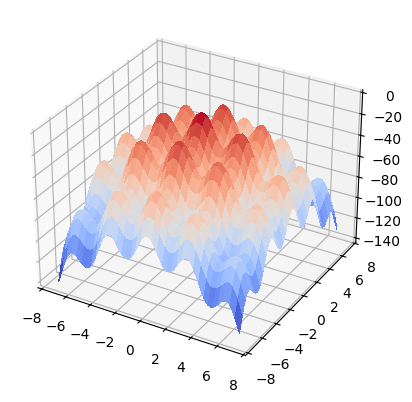

In [21]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x1 = np.arange(-2*np.pi-1, 2*np.pi+1, 0.2)
x2 = np.arange(-2*np.pi-1, 2*np.pi+1, 0.2)
X1, X2 = np.meshgrid(x1, x2)
Y = np.zeros((X1.shape[0], X1.shape[1]))


for i in range(Y.shape[0]):
    for j in range(Y.shape[1]):

        x = np.array([X1[i, j], X2[i, j]])

        Y[i, j] = objectiveFunction(x)

surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False)
plt.show()

In [22]:
sigmoidFun = lambda u: (1 + np.exp(-u)) ** -1

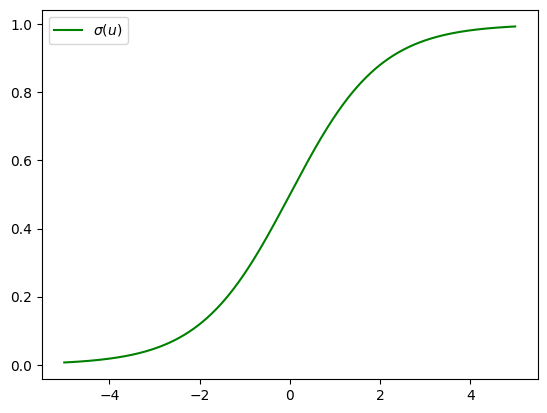

In [23]:
u = np.arange(-5, 5, 0.01)
plt.plot(u, sigmoidFun(u), 'g-', label ='$\\sigma(u)$')
plt.legend()
plt.show()

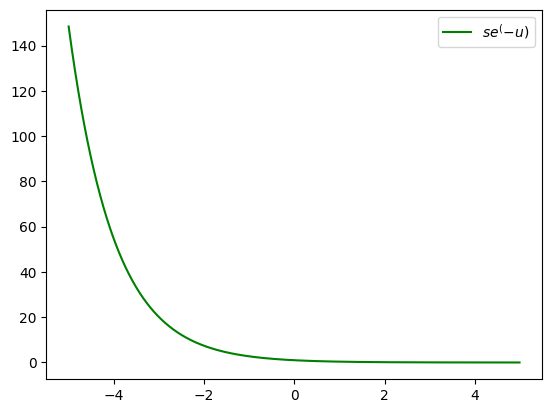

In [24]:
u = np.arange(-5, 5, 0.01)
plt.plot(u, np.exp(-u), 'g-', label ='$se^(-u)$')
plt.legend()
plt.show()

In [25]:
def plotIteration(i, T, x_c, x_n, best_x, plt, ax):
  ax.cla()
  ax.contour(X1, X2, Y, 50)
  ax.contour(X1, X2, Y, cmap=cm.coolwarm, levels=50)
  ax.plot(np.array([x_n[0]]), np.array([x_n[1]]), 'r+')
  ax.plot(np.array([x_c[0]]), np.array([x_c[1]]), 'k+')
  ax.plot(np.array([best_x[0]]), np.array([best_x[1]]), 'kx')
  ax.set_title('iteration {:}, temperature {:.12f}, best subjeb score {:.10f}'.format(
      i, T, objectiveFunction(best_x)))
  display.display(plt.gcf())
  display.clear_output(wait=True)
  sleep(0.0001)

In [ ]:
def simulatedAnnealing(mint, maxT, r, max_t, n):
    x_c = -(2*np.pi-2*np.pi) * np.random.rand(n) - 2*np.pi  
    best_x = x_c 
    T = maxT
    fig, ax = plt.subplots() 
    t = 1

    while T > mint and t < max_t:
        x_n = x_c + np.random.randn(n)  
        x_n[x_n < -2*np.pi] = -2*np.pi - 1e-15 
        x_n[x_n > 2*np.pi] = 2*np.pi - 1e-15
        plotIteration(t, T, x_c, x_n, best_x, plt, ax) 

        if objectiveFunction(x_c) < objectiveFunction(x_n):  
            x_c = x_n
        elif np.random.rand() < sigmoidFun((objectiveFunction(x_n) - objectiveFunction(x_c)) / T):
            x_c = x_n

        if objectiveFunction(best_x) < objectiveFunction(x_c):
            best_x = x_c

        T = r * T
        t += 1

    plotIteration(t, T, x_c, x_n, best_x, plt, ax) # function not defined here
    return best_x

solution
[-0.00835691  0.01406648]


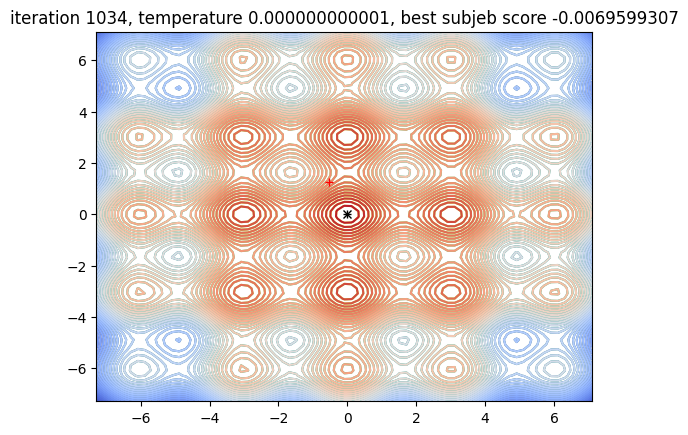

In [27]:
minT, maxT, r, max_t, n = 1e-12, 1e11, 0.95, 1200, 2
best_x = simulatedAnnealing(minT, maxT, r, max_t, n)
print('solution')
print(best_x)